In [15]:
# библиотека для работы с массивами
import numpy as np 

# Требуемые модули из sklearn
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [2]:
import matplotlib.pyplot as plt

In [3]:
def plot_2d_separator(classifier, X, fill=False, line=True, ax=None, eps=None):
    if eps is None:
        eps = 1.0 #X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)
    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]
        if ax is None:
            ax = plt.gca()
        if fill:
            ax.contourf(X1, X2, decision_values.reshape(X1.shape),
            levels=fill_levels, colors=['cyan', 'pink', 'yellow'])
        if line:
            ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels, colors="black")
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())

In [4]:
X, y = make_blobs(centers = 2 , random_state = 23, cluster_std  = 5, shuffle = True, n_samples=1000)
print ("Координаты точек: ") 
print (X[:15])
print ("Метки класса: ") 
print (y[:15])

Координаты точек: 
[[  0.81901591   2.66053355]
 [  0.16565773  -5.66478788]
 [ -2.50782933   8.70470467]
 [  4.41056129  -8.27885686]
 [ 10.59864583 -10.51814747]
 [ -0.79583786  -3.31752817]
 [ -0.74668032   6.94941725]
 [  3.41425727  -4.23654889]
 [ -7.31374257   1.0436578 ]
 [  1.2141259    2.82297821]
 [ -1.47897749  -1.03391545]
 [ -1.95503888  -0.97140879]
 [ -0.26608559   3.11283563]
 [ -1.82145342  -8.16865617]
 [  1.51129404   1.58330773]]
Метки класса: 
[1 1 0 1 1 1 0 1 1 0 1 1 0 1 0]


<function matplotlib.pyplot.show(close=None, block=None)>

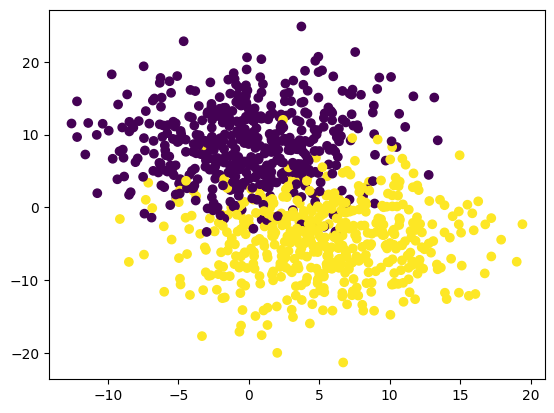

In [5]:
plt.scatter (X[:,0], X[:,1], c=y)
plt.show

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 23)

<function matplotlib.pyplot.show(close=None, block=None)>

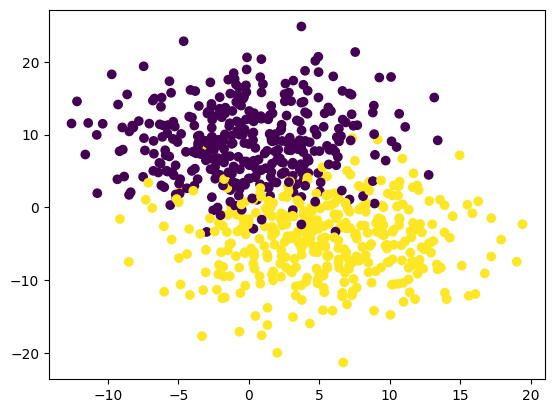

In [7]:
plt.scatter (X_train[:,0],X_train[:,1], c=y_train)
plt.show

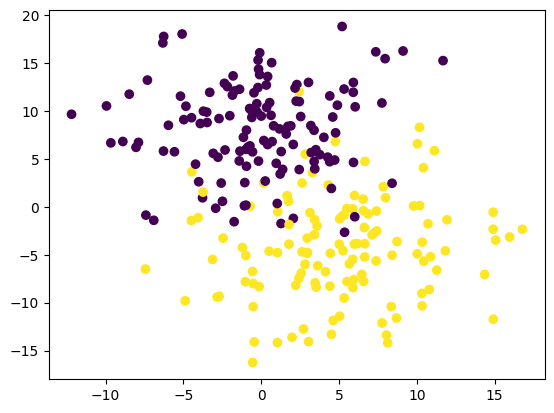

In [8]:
plt.scatter (X_test[:,0],X_test[:,1], c=y_test)
plt.show()

In [9]:
knn_1 = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')
knn_1.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [10]:
prediction = knn_1.predict(X_test)

Prediction and test: 
[1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0
 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1
 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0
 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0
 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1]
[1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0
 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1
 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1
 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0
 0 0 1 0 1 0 1 1 1 1

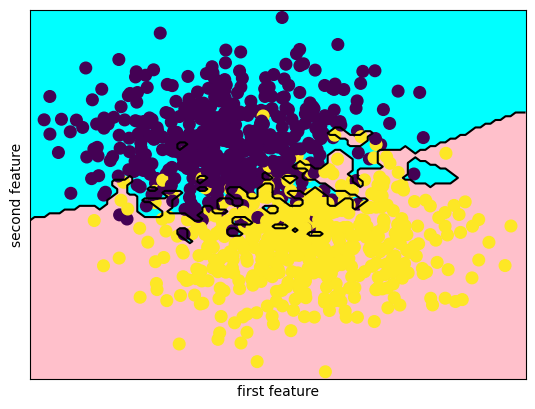

In [14]:
print ('Prediction and test: ')
print (prediction)
print (y_test)
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))
print(classification_report(y_test, prediction))
print('AUC ROC: ')
roc_auc_score(y_test, prediction)

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn_1, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

In [17]:
knn_3 = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')
knn_9 = KNeighborsClassifier(n_neighbors=9, metric = 'euclidean')

NB = GaussianNB()

RForest_5 = RandomForestClassifier(n_estimators=5, random_state=23)
RForest_15 = RandomForestClassifier(n_estimators=15, random_state=23)
RForest_50 = RandomForestClassifier(n_estimators=50, random_state=23)

knn_3.fit(X_train, y_train)
knn_9.fit(X_train, y_train)
NB.fit(X_train, y_train)
RForest_5.fit(X_train, y_train)
RForest_15.fit(X_train, y_train)
RForest_50.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50, random_state=23)

In [19]:
models = [knn_3, knn_9, NB, RForest_5, RForest_15, RForest_50]

Model: KNeighborsClassifier(metric='euclidean', n_neighbors=3)
Prediction and test: 
[1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0
 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1
 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0
 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0]
[1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0
 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1
 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1
 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1

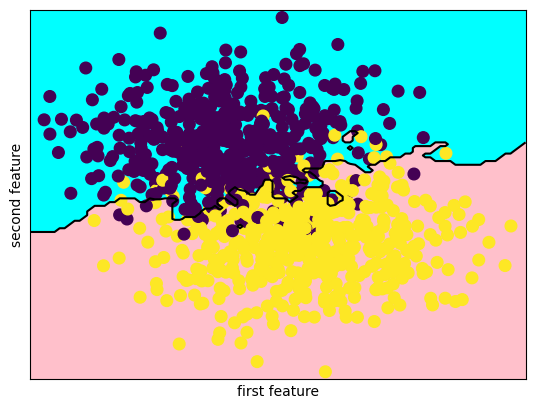

Model: KNeighborsClassifier(metric='euclidean', n_neighbors=9)
Prediction and test: 
[1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0
 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1
 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0
 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0]
[1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0
 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1
 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1
 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1

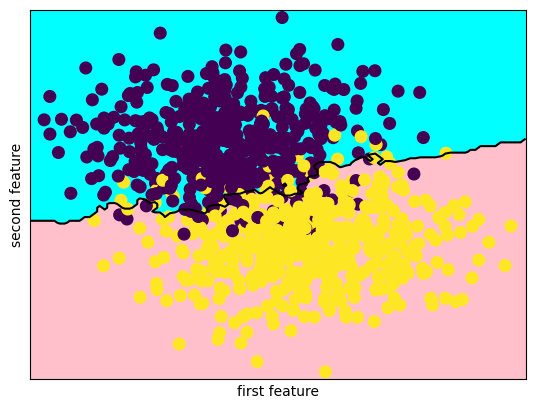

Model: GaussianNB()
Prediction and test: 
[1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0
 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0
 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1
 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0
 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1]
[1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0
 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1
 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1
 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0


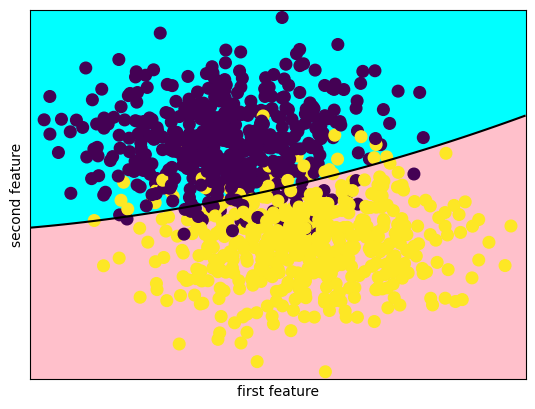

Model: RandomForestClassifier(n_estimators=5, random_state=23)
Prediction and test: 
[1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0
 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0
 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1
 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0
 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1]
[1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0
 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1
 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1
 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1

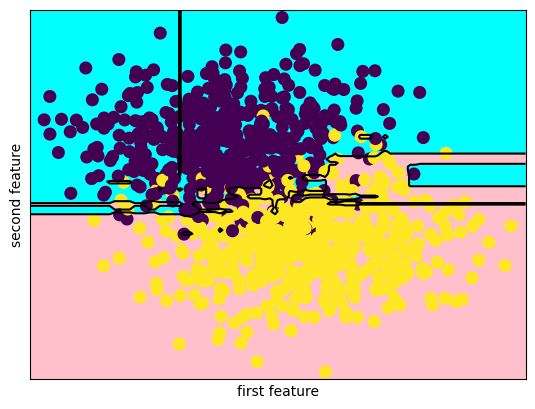

Model: RandomForestClassifier(n_estimators=15, random_state=23)
Prediction and test: 
[1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0
 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0
 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1
 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0
 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1]
[1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0
 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1
 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1
 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 

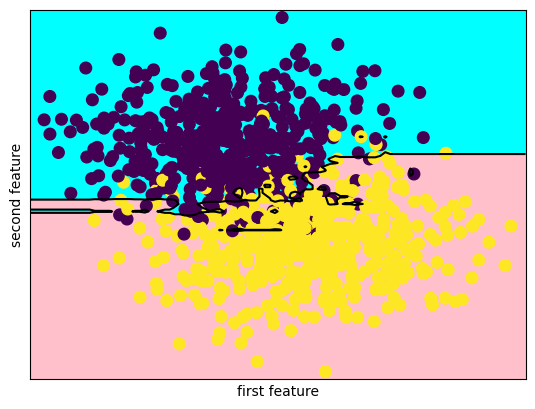

Model: RandomForestClassifier(n_estimators=50, random_state=23)
Prediction and test: 
[1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0
 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1
 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0
 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1]
[1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0
 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1
 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1
 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 

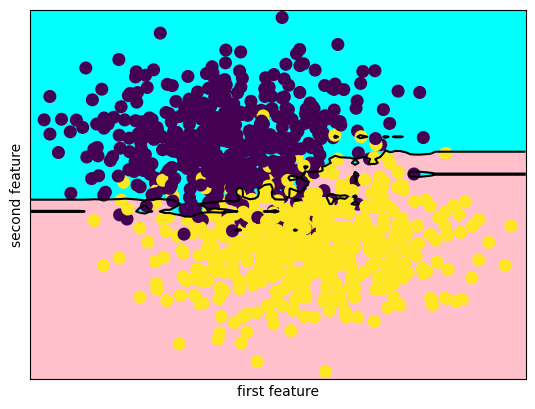

In [25]:
for model in models:
    print('Model:',model)
    prediction = model.predict(X_test)

    print ('Prediction and test: ')
    print (prediction)
    print (y_test)
    print ('Confusion matrix: ')
    print (confusion_matrix(y_test, prediction))
    print ('Accuracy score: ', accuracy_score(prediction, y_test))
    print(classification_report(y_test, prediction))
    print('AUC ROC: ',roc_auc_score(y_test, prediction))
    

    plt.xlabel("first feature")
    plt.ylabel("second feature")
    plot_2d_separator(model, X, fill=True)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=70)
    plt.show()